<a href="https://colab.research.google.com/github/hendriksuvalov/housepriceskaggle/blob/main/IDS_project_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Science (LTAT.02.002)

# Project: House Prices - Advanced Regression Techniques

#### Team: Hendrik Suvalov, Raul Tölp

**Description**:
* Kaggle competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/rules
* Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Goals: 
* what influences the house price
* predict final price with Linear Regression or Random Forest model
 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split

# Resize Colab results view
from IPython.display import Javascript
pd.set_option('max_rows', 99999)
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Andmete sisselugemine ja uurimine

In [ ]:
# Andmetabeli üldkuju
df = pd.read_csv("train.csv", sep=',') # eelnevalt lae andmed colabi Files ikoon->Upload
df_test = pd.read_csv("test.csv", sep=',') # eelnevalt lae andmed colabi Files ikoon->Upload
df.head()

<IPython.core.display.Javascript object>

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
# Tabeli mõõtmed
df.shape, df_test.shape

<IPython.core.display.Javascript object>

((1460, 81), (1459, 80))

In [ ]:
# Tabeli tulpade tüübid
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Tabeli tulpade statistilised andmed
df.describe(include='all')

<IPython.core.display.Javascript object>

Id   MSSubClass  ... SaleCondition      SalePrice
count   1460.000000  1460.000000  ...          1460    1460.000000
unique          NaN          NaN  ...             6            NaN
top             NaN          NaN  ...        Normal            NaN
freq            NaN          NaN  ...          1198            NaN
mean     730.500000    56.897260  ...           NaN  180921.195890
std      421.610009    42.300571  ...           NaN   79442.502883
min        1.000000    20.000000  ...           NaN   34900.000000
25%      365.750000    20.000000  ...           NaN  129975.000000
50%      730.500000    50.000000  ...           NaN  163000.000000
75%     1095.250000    70.000000  ...           NaN  214000.000000
max     1460.000000   190.000000  ...           NaN  755000.000000

[11 rows x 81 columns]

## NB! pairplot kogu andmestikule võtab colabis u 10-15 min aega

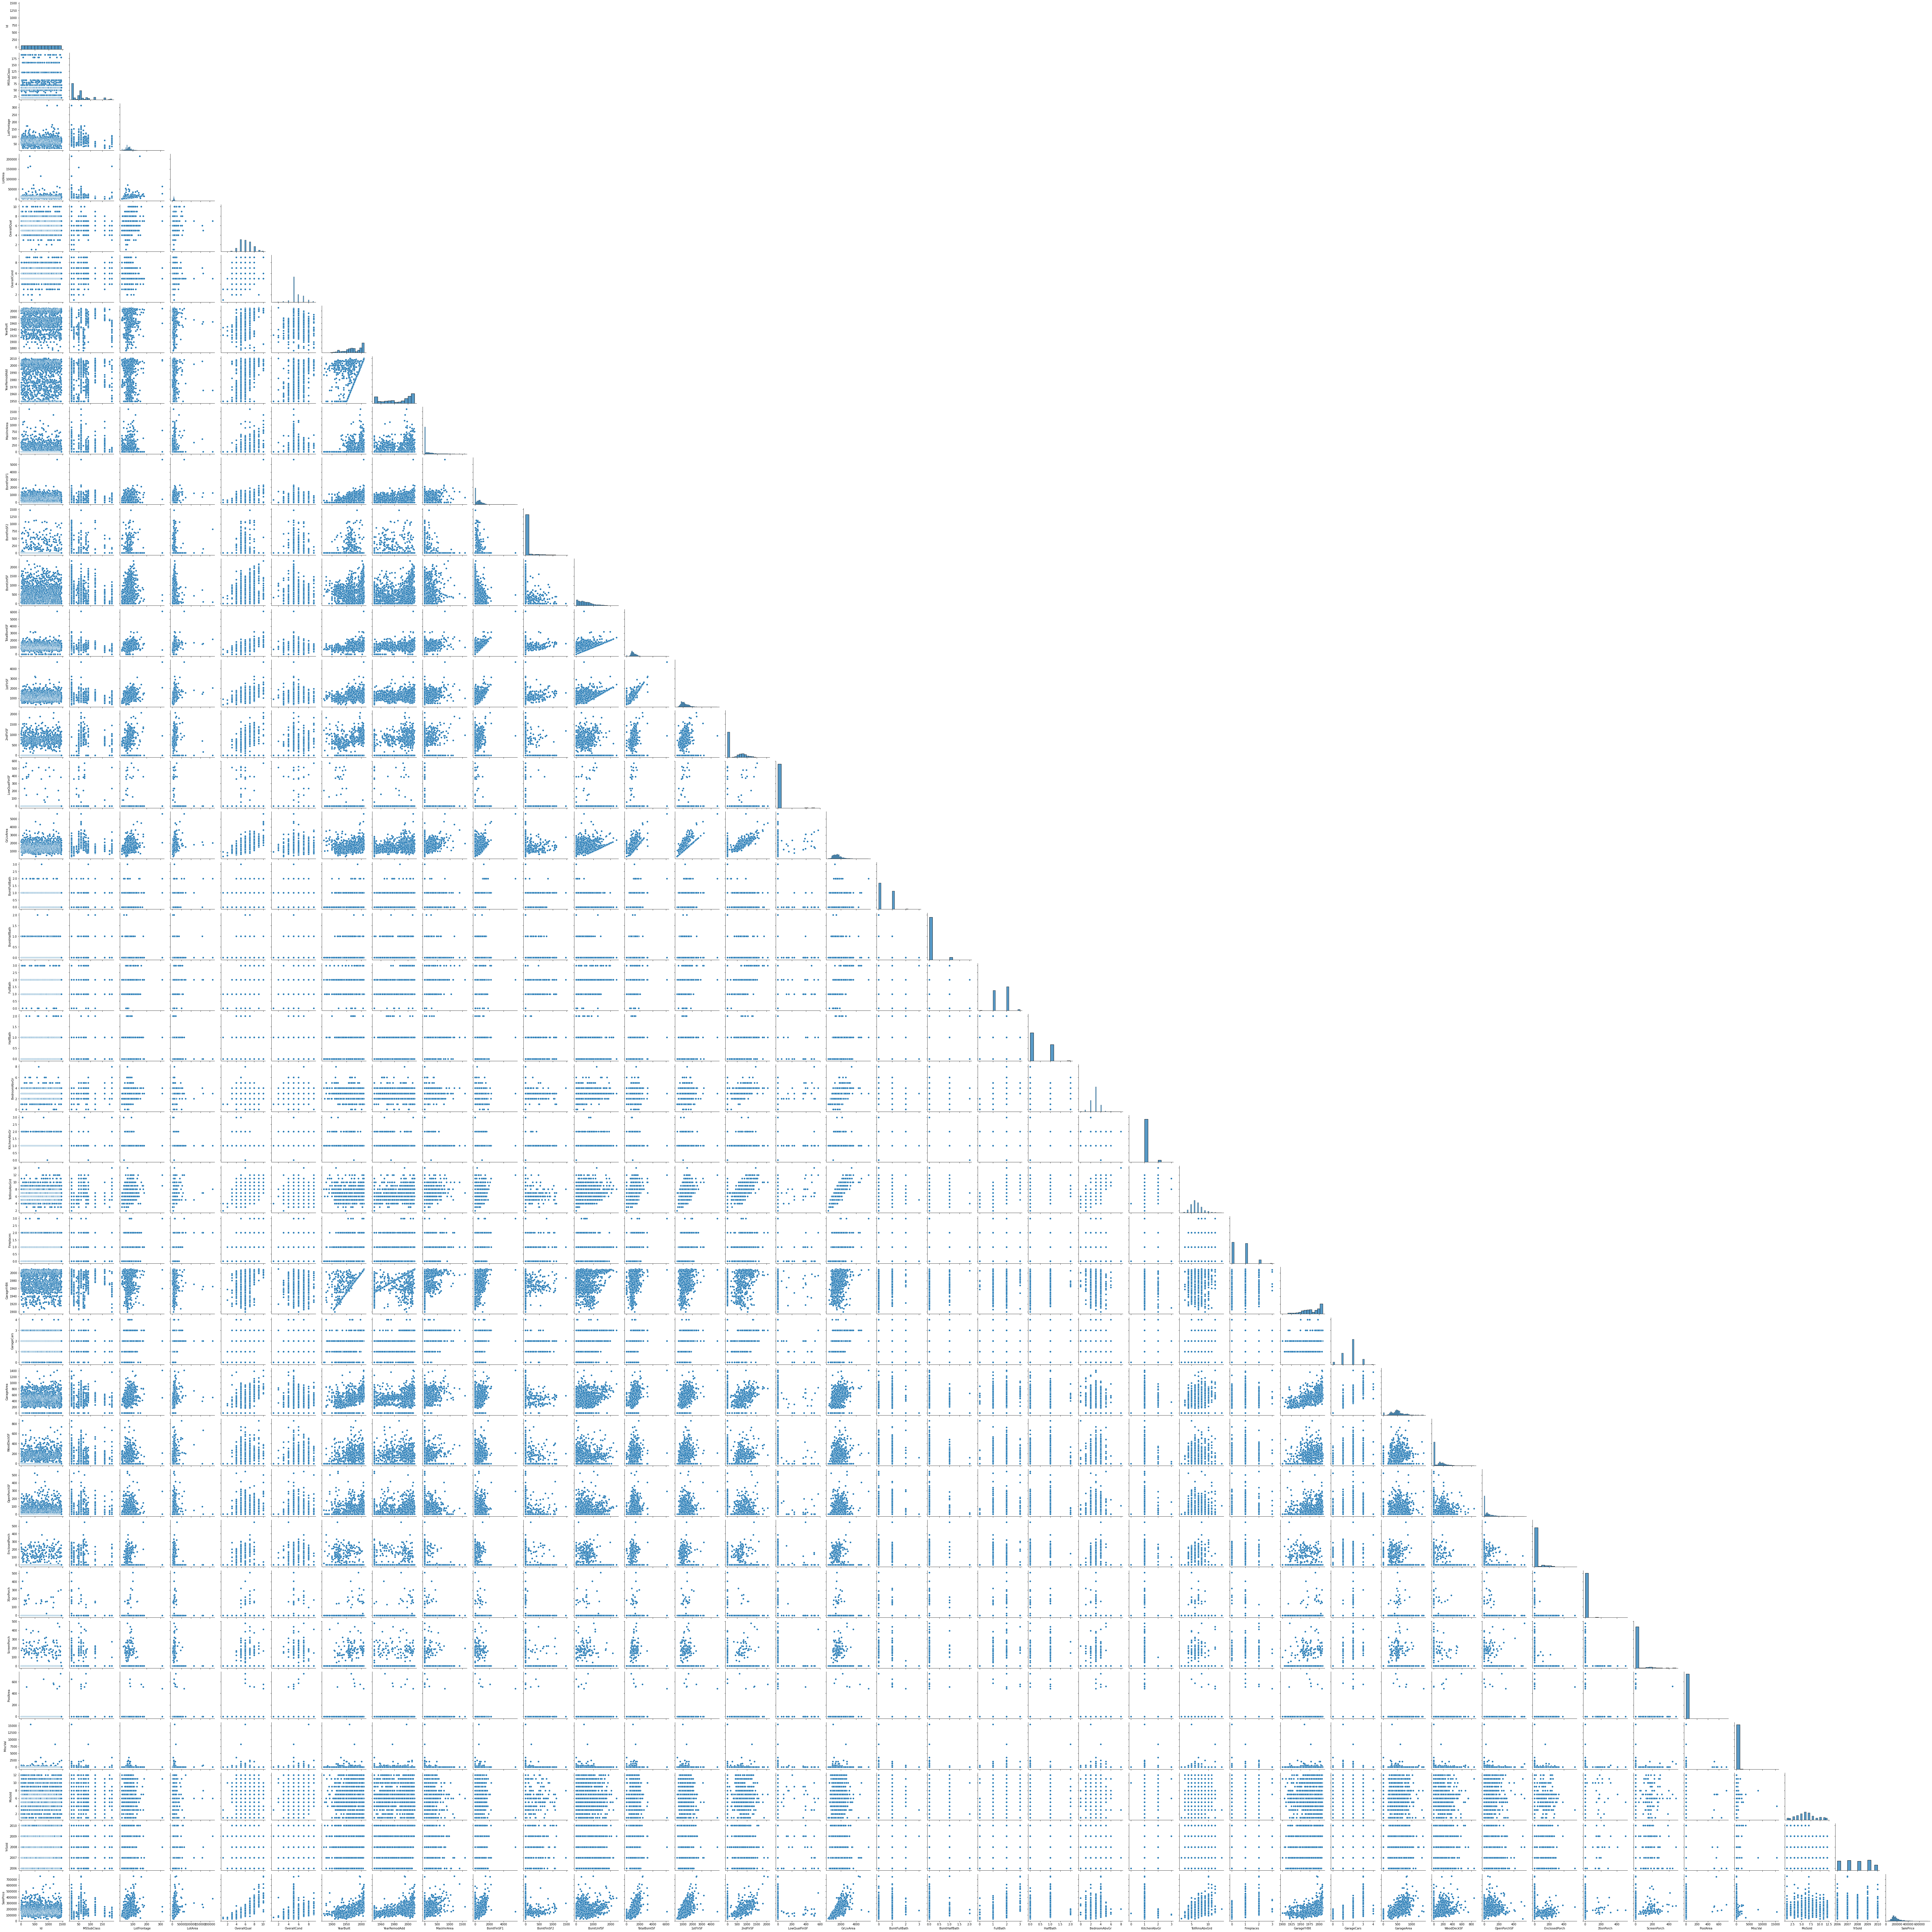

In [ ]:
# Andmete tegelikud ja omavahelised jaotused ülevaate saamiseks

# HETKEL VÄLJA KOMMITUD

# g = sns.pairplot(df)
# # ülemine osa on kordus, pole vaja visualiseerida
# for i, j in zip(*np.triu_indices_from(g.axes, 1)):
#     g.axes[i, j].set_visible(False)

In [ ]:
# Unikaalsete tunnuste arv tulpades
df.nunique()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

# Andmete eeltöötlus

In [ ]:
# Kas on andmeid puudu
df.isna().sum()
# df.rida.dropna() # juhuks kui mingi andmed osutuvad ebaoluliseks või hakkavad segama hilisemat analüüsi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Kas on korduvaid ridu
df.duplicated().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0

In [ ]:
# Muudame tulpade admetüübid sobivaks kategooriaks
# df.tulp = df.tulp.astype('category')
# df.tulp = df.tulp.astype('int')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Kontroll
df.dtypes

<IPython.core.display.Javascript object>

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
# teeme parandatud tabelist varukoopia
df_varukoopia = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
# Tabel muudetud kujul
df.head()

<IPython.core.display.Javascript object>

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

### Feature engineering

In [ ]:
SalePrices = df['SalePrice']
# df_feat = df.drop('SalePrice', axis=1)
df_feat = df.drop('Id', axis=1)

<IPython.core.display.Javascript object>

In [ ]:
# # Filling missing values with most frequent of that column
# df_feat = df_feat.fillna(df_feat.mode().iloc[0])

<IPython.core.display.Javascript object>

In [ ]:
numerical_columns = df_feat.select_dtypes(include=['int64', 'float64']).columns

<IPython.core.display.Javascript object>

In [ ]:
Q1 = df_feat[numerical_columns].quantile(0.03)
Q3 = df_feat[numerical_columns].quantile(0.97)
IQR = Q3 - Q1

df_feat = df_feat[~((df_feat[numerical_columns] < (Q1 - 1.5 * IQR)) |(df_feat[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

<IPython.core.display.Javascript object>

In [ ]:
columns_to_mess_with = df_feat.select_dtypes(exclude=['int64', 'float64']).nunique()

<IPython.core.display.Javascript object>

In [ ]:
df_feat.select_dtypes(exclude=['int64', 'float64']).nunique()

<IPython.core.display.Javascript object>

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        7
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          6
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            0
Fence             4
MiscFeature       1
SaleType          9
SaleCondition     6
dtype: int64

In [ ]:
# Ma vaatan iga columni puhul, millel ei ole numbriline väärtus,
# mis mingi unikaalse väärtuse puhul keskmine SalePrice on,
# järjestan nad selle järgi, ja siis asendan numbriga

for column_name in columns_to_mess_with.keys():

  mapping_dict = {}

  for i in df_feat[column_name].unique():
    mapping_dict[i] = df_feat[df_feat[column_name] == i]['SalePrice'].mean()

  sorted_dict = sorted(mapping_dict.items(), key=lambda p:p[1])
 
  replace_dict = {}

  for s in [(k+1, v) for k, v in enumerate([i[0] for i in sorted_dict])]:
    # s[0] = numeric value, starting from 1
    # s[1] = class value, starting from lowest mean saleprice
    replace_dict[s[1]] = s[0]
  replace_dict[np.nan] = 0

  df_feat = df_feat.replace({column_name: replace_dict})



<IPython.core.display.Javascript object>

In [ ]:
df_feat.head(5)

<IPython.core.display.Javascript object>

MSSubClass  MSZoning  LotFrontage  ...  SaleType  SaleCondition  SalePrice
0          60         4         65.0  ...         5              5     208500
1          20         4         80.0  ...         5              5     181500
2          60         4         68.0  ...         5              5     223500
3          70         4         60.0  ...         5              2     140000
4          60         4         84.0  ...         5              5     250000

[5 rows x 80 columns]

## Teeme sellest mudelid

In [ ]:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


# we dont use it for now idk
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value != min_value:
          result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# numerical_columns = normalize(numerical_columns)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def LinearRegressionMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)

  preds = model.predict(X_test)
  mse = mean_squared_error(preds, y_test, squared=False)

  print("Linear Regression RMSE:", mse)
  # print("Score:", model.score(X_test, y_test))

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def RandomForestClassifierMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = RandomForestClassifier(n_estimators=100)

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Random Forest RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import Ridge

def RidgeMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = Ridge(alpha=0, max_iter=20000)

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Ridge RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import linear_model

def LassoMudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = linear_model.Lasso(alpha=0.1)

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Lasso RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def GBCmudel(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0, max_features=int(np.log(len(X.columns))))

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  # print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # probably kinda useless since there are so many clases
  print("Gradient Booster RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

  return model

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

# Replace NaN values with means
df_feat = df_feat.fillna(df_feat.mean())

X = df_feat.drop('SalePrice', axis=1)
y = df_feat['SalePrice']

# kind of ebavajalik RMSE suhtes vähemalt linregress ja RF-iga
X = normalize(X)

# Siit tuleb praeguse seisuga välja, et ikka mida rohkem featureid, seda uhkem

# good_features = [i[0] for i in sorted(X.corrwith(y).items(), key=lambda p:p[1], reverse=True)][:60]
# X = X[good_features]

# mudel = LinearRegressionMudel(X, y)
# mudel_RF = RandomForestClassifierMudel(X, y)
# mudel_Ridge = RidgeMudel(X, y)
# mudel_lasso = LassoMudel(X, y)
mudel_GBC = GBCmudel(X, y) # n_estimators 100, learning rate 1, max_depth 3 annab RMSE 86521.334259781 mis on suht halb


<IPython.core.display.Javascript object>

Gradient Booster RMSE: 91215.57067022962


In [ ]:
X.head(5)

<IPython.core.display.Javascript object>

MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
0    0.235294      0.75     0.273292  ...    0.50       0.5            0.8
1    0.000000      0.75     0.366460  ...    0.25       0.5            0.8
2    0.235294      0.75     0.291925  ...    0.50       0.5            0.8
3    0.294118      0.75     0.242236  ...    0.00       0.5            0.2
4    0.235294      0.75     0.391304  ...    0.50       0.5            0.8

[5 rows x 79 columns]

# Analüüs 1

In [ ]:
# Getting Pearson correlations of any numeric valued columns with SalePrice
correlations = df.corr().iloc[:-1, -1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in sorted(correlations.items(), reverse=True, key=lambda p:p[1]):
  print(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

('OverallQual', 0.7909816005838047)
('GrLivArea', 0.7086244776126511)
('GarageCars', 0.640409197258349)
('GarageArea', 0.6234314389183598)
('TotalBsmtSF', 0.6135805515591944)
('1stFlrSF', 0.6058521846919166)
('FullBath', 0.5606637627484452)
('TotRmsAbvGrd', 0.5337231555820238)
('YearBuilt', 0.5228973328794967)
('YearRemodAdd', 0.5071009671113867)
('GarageYrBlt', 0.48636167748786213)
('MasVnrArea', 0.4774930470957107)
('Fireplaces', 0.4669288367515242)
('BsmtFinSF1', 0.38641980624215627)
('LotFrontage', 0.35179909657067854)
('WoodDeckSF', 0.32441344456813076)
('2ndFlrSF', 0.31933380283206614)
('OpenPorchSF', 0.31585622711605577)
('HalfBath', 0.2841076755947784)
('LotArea', 0.2638433538714063)
('BsmtFullBath', 0.22712223313149718)
('BsmtUnfSF', 0.214479105546969)
('BedroomAbvGr', 0.1682131543007415)
('ScreenPorch', 0.11144657114291048)
('PoolArea', 0.09240354949187278)
('MoSold', 0.04643224522381936)
('3SsnPorch', 0.04458366533574792)
('BsmtFinSF2', -0.011378121450215216)
('BsmtHalfBath'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

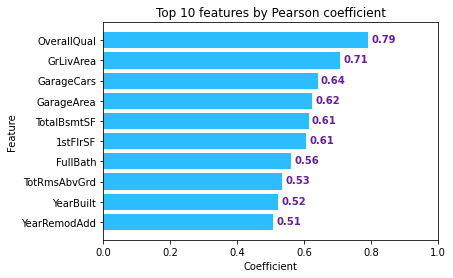

In [ ]:
x, y = zip(*sorted(correlations.items(), reverse=True, key=lambda p:p[1])[:10])

fig, ax = plt.subplots()

ax.barh(x, y, color='#2CBDFE')
plt.xlim(0, 1)
plt.ylabel("Feature")
plt.xlabel("Coefficient")
for i, v in enumerate(y):
    ax.text(v+0.01, i+0.1, str(round(v, 2)), color='#661D98', fontweight='bold')

fig.gca().invert_yaxis()



plt.title('Top 10 features by Pearson coefficient')
plt.show()

### Proovin mudeli kaudu .coef-ide võtmist

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

model = LinearRegression()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
numerical_columns.head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MSSubClass  LotFrontage  LotArea  ...  MoSold  YrSold  SalePrice
0          60         65.0     8450  ...       2    2008     208500
1          20         80.0     9600  ...       5    2007     181500
2          60         68.0    11250  ...       9    2008     223500
3          70         60.0     9550  ...       2    2006     140000
4          60         84.0    14260  ...      12    2008     250000

[5 rows x 37 columns]

In [ ]:
numerical_columns = numerical_columns.fillna(numerical_columns.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = numerical_columns.drop('SalePrice', axis=1)
y = numerical_columns['SalePrice']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.fit(X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LinearRegression()

## LinearRegressioni koeffitsendid

In [ ]:
from collections import OrderedDict


importance = model.coef_


importance_dict = OrderedDict()

for i, v in enumerate(importance):
  importance_dict[X.columns[i]] = v

sortimorti = sorted(importance_dict.items(), reverse=True, key = lambda p: p[1])

sortimorti

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('OverallQual', 17323.840427331877),
 ('GarageCars', 11234.641020581417),
 ('BsmtFullBath', 9359.12950457554),
 ('TotRmsAbvGrd', 5063.413264687483),
 ('OverallCond', 4664.874989163895),
 ('Fireplaces', 3966.4304419509813),
 ('FullBath', 3448.2687996503396),
 ('BsmtHalfBath', 2037.721921125443),
 ('YearBuilt', 271.65036955328577),
 ('YearRemodAdd', 136.0780336196368),
 ('GarageYrBlt', 121.15469159345136),
 ('ScreenPorch', 56.00466838251706),
 ('MasVnrArea', 31.4639297654675),
 ('GrLivArea', 30.891685417995195),
 ('WoodDeckSF', 24.02155419721242),
 ('3SsnPorch', 20.49617261199287),
 ('2ndFlrSF', 18.10156629051371),
 ('1stFlrSF', 18.05829325741962),
 ('EnclosedPorch', 11.826794194944496),
 ('BsmtFinSF1', 10.000856864404524),
 ('TotalBsmtSF', 9.199229606607373),
 ('LotArea', 0.4300135427031969),
 ('BsmtUnfSF', 0.11323660949800898),
 ('MiscVal', -0.7301823831229406),
 ('BsmtFinSF2', -0.9148638630127225),
 ('OpenPorchSF', -2.871141962082196),
 ('GarageArea', -4.236467890624699),
 ('LowQualF

## Korrelatsioonikordajad

In [ ]:
for i in sorted(X.corrwith(y).items(), reverse=True, key=lambda p:p[1]):
  print(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

('OverallQual', 0.7909816005838044)
('GrLivArea', 0.7086244776126523)
('GarageCars', 0.6404091972583529)
('GarageArea', 0.6234314389183618)
('TotalBsmtSF', 0.6135805515591956)
('1stFlrSF', 0.6058521846919147)
('FullBath', 0.5606637627484449)
('TotRmsAbvGrd', 0.5337231555820282)
('YearBuilt', 0.5228973328794969)
('YearRemodAdd', 0.5071009671113864)
('MasVnrArea', 0.47524131677366865)
('GarageYrBlt', 0.4701774537404798)
('Fireplaces', 0.4669288367515272)
('BsmtFinSF1', 0.3864198062421532)
('LotFrontage', 0.3349008515405508)
('WoodDeckSF', 0.3244134445681295)
('2ndFlrSF', 0.3193338028320681)
('OpenPorchSF', 0.31585622711605554)
('HalfBath', 0.2841076755947831)
('LotArea', 0.2638433538714057)
('BsmtFullBath', 0.2271222331314938)
('BsmtUnfSF', 0.21447910554696892)
('BedroomAbvGr', 0.16821315430073985)
('ScreenPorch', 0.11144657114291107)
('PoolArea', 0.09240354949187321)
('MoSold', 0.04643224522381938)
('3SsnPorch', 0.04458366533574846)
('BsmtFinSF2', -0.011378121450215127)
('BsmtHalfBath',

### Lineaarregressioonimudel

In [ ]:
def clean_test_for_submission(df):

  numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)

  # numerical_columns = normalize(numerical_columns)

  df_cleaned = numerical_columns.fillna(numerical_columns.mean())

  return df_cleaned

X_test = clean_test_for_submission(df_test)

<IPython.core.display.Javascript object>

In [ ]:
X_test.head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MSSubClass  LotFrontage  LotArea  ...  MiscVal  MoSold  YrSold
0          20         80.0    11622  ...        0       6    2010
1          20         81.0    14267  ...    12500       6    2010
2          60         74.0    13830  ...        0       3    2010
3          60         78.0     9978  ...        0       6    2010
4         120         43.0     5005  ...        0       1    2010

[5 rows x 36 columns]

In [ ]:
predictions = model.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions.shape

results = {}

for i, v in enumerate(predictions):
  # print(1461+i, v)
  results[1461+i] = v
  
  #break

res_df = pd.DataFrame()
results_df = res_df.from_dict(orient='index', data=results, columns=['SalePrice'])

results_df = results_df.reset_index()
results_df.columns

# results_df.reset_index()
results_df.columns=['Id', 'SalePrice']

print(results_df.head(5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results_df.to_csv('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4652 / 5393 positsioon

# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# replace NaN with mean

numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop('Id', axis=1)

numerical_columns = numerical_columns.fillna(numerical_columns.mean())

X = numerical_columns.drop('SalePrice', axis=1)
y = numerical_columns['SalePrice']

clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X, y)



<IPython.core.display.Javascript object>

RandomForestClassifier(max_depth=8, random_state=0)

In [ ]:
predictions = clf.predict(X_test)

results = {}

for i, v in enumerate(predictions):
  # print(1461+i, v)
  results[1461+i] = v
  
  #break

res_df = pd.DataFrame()
results_df = res_df.from_dict(orient='index', data=results, columns=['SalePrice'])

results_df = results_df.reset_index()
results_df.columns

# results_df.reset_index()
results_df.columns=['Id', 'SalePrice']

print(results_df.head(5))

results_df.to_csv('submission.csv', index=False)

<IPython.core.display.Javascript object>

     Id  SalePrice
0  1461     110000
1  1462     160000
2  1463     176000
3  1464     185000
4  1465     176000


# Analüüs 3

# Analüüs 4

# Tulemused ja kokkuvõte